In [28]:
# Try it out !
# Uncomment the code to run this cell
# Code Below
# Calculating Conditional Probability using Bayes Theorem :-
#---------------------------------------------------------------------------------------------------------------------------

# P_A = float(input("Enter the probability of event A =  "))  # Probability of event A
# P_B_given_A = float(input("Enter the probability of event B given event A =  "))  # Probability of event B given event A

# # Calculate the complement of event A
# P_not_A = 1 - P_A

# # Calculate the probability of event B
# P_B = P_B_given_A * P_A + (1 - P_B_given_A) * P_not_A

# # Calculate the conditional probability using Bayes' theorem
# P_A_given_B = (P_B_given_A * P_A) / P_B

# # Print the results
# print(f"P(A|B) = {P_A_given_B:.2f}")

In [29]:
#Importing the Necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
# Reading the data from .csv file
data = pd.read_csv('spam.csv')

In [31]:
#display the first 5 rows
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [32]:
# Drop the columns with NaN values
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Drop duplicate value
data = data.drop_duplicates()

# Rename columns for clarity:
data.columns = ['label', 'text']

# Separate features (X) and target labels (y)
X =  data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Displaying the first 5 rows to get basic understanding of the data
print(data.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the training data (X_train)
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
# Transform the test data (X_test)
X_test_vectorized = vectorizer.transform(X_test['text'])

# Train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [35]:
# Make predictions on the test data
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.99
Confusion Matrix:
[[887   2]
 [ 13 132]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       889
        spam       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



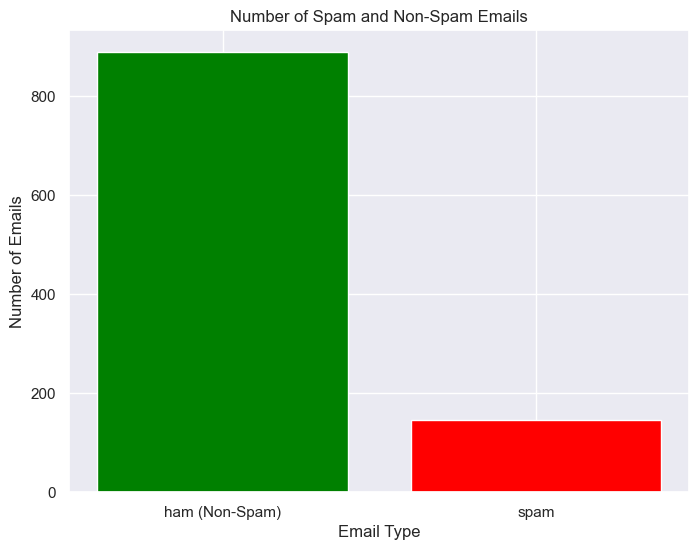

In [36]:
import matplotlib.pyplot as plt

# Count the number of spam and non-spam emails in the test set
spam_counts = y_test.value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(spam_counts.index, spam_counts.values, color=['green', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Number of Emails')
plt.title('Number of Spam and Non-Spam Emails')
plt.xticks([0, 1], ['ham (Non-Spam)', 'spam'])
plt.show()

In [37]:
# New emails to classify
new_emails = [
    "Congratulations! You've been selected to receive a free iPhone! Click here to claim now!",
    "Urgent: Your account has been compromised! Click this link immediately to protect your account.",
    "You've won £1000 in our lottery! Send your bank details to claim your prize.",
    "Hi there, just a reminder about our meeting tomorrow at 10 AM. Please let me know if you need to reschedule.",
    "Dear customer, your order has been shipped. You can track your package using this tracking number: AB123456789.",
]

# Convert the new emails to the numerical format
new_emails_counts = vectorizer.transform(new_emails)

# Predict whether each email is spam or not
predictions = classifier.predict(new_emails_counts)

# Print the predictions
for email, prediction in zip(new_emails, predictions):
    print(f"Email: {email}\nPrediction: {prediction}\n")

Email: Congratulations! You've been selected to receive a free iPhone! Click here to claim now!
Prediction: spam

Email: Urgent: Your account has been compromised! Click this link immediately to protect your account.
Prediction: spam

Email: You've won £1000 in our lottery! Send your bank details to claim your prize.
Prediction: spam

Email: Hi there, just a reminder about our meeting tomorrow at 10 AM. Please let me know if you need to reschedule.
Prediction: ham

Email: Dear customer, your order has been shipped. You can track your package using this tracking number: AB123456789.
Prediction: ham



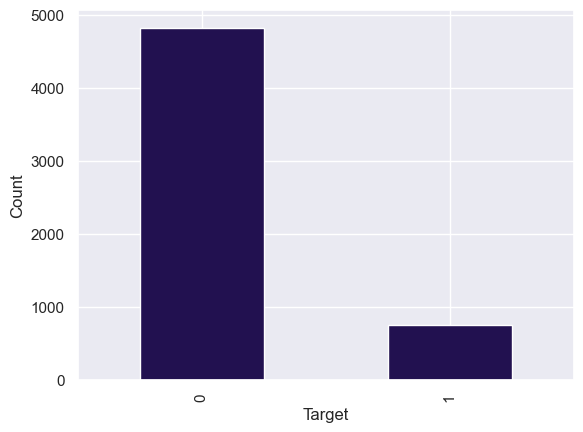

KeyboardInterrupt: 

In [38]:

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:21.813963Z","iopub.execute_input":"2023-07-13T12:11:21.814392Z","iopub.status.idle":"2023-07-13T12:11:21.856406Z","shell.execute_reply.started":"2023-07-13T12:11:21.814284Z","shell.execute_reply":"2023-07-13T12:11:21.855438Z"}}
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:21.858720Z","iopub.execute_input":"2023-07-13T12:11:21.859301Z","iopub.status.idle":"2023-07-13T12:11:21.920281Z","shell.execute_reply.started":"2023-07-13T12:11:21.859251Z","shell.execute_reply":"2023-07-13T12:11:21.919094Z"}}
data= pd.read_csv('spam.csv')
data.head()

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:21.921709Z","iopub.execute_input":"2023-07-13T12:11:21.922018Z","iopub.status.idle":"2023-07-13T12:11:21.936978Z","shell.execute_reply.started":"2023-07-13T12:11:21.921984Z","shell.execute_reply":"2023-07-13T12:11:21.935940Z"}}
#Dropping the last 3 columns
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:21.938416Z","iopub.execute_input":"2023-07-13T12:11:21.938740Z","iopub.status.idle":"2023-07-13T12:11:21.963193Z","shell.execute_reply.started":"2023-07-13T12:11:21.938695Z","shell.execute_reply":"2023-07-13T12:11:21.962038Z"}}
#Renaming the columns to be understandable
data.rename(columns={'v1': 'Target', 'v2': 'Email'}, inplace=True)
data.head()

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:21.965955Z","iopub.execute_input":"2023-07-13T12:11:21.966226Z","iopub.status.idle":"2023-07-13T12:11:21.985594Z","shell.execute_reply.started":"2023-07-13T12:11:21.966194Z","shell.execute_reply":"2023-07-13T12:11:21.984826Z"}}
#Mapping the target labels to 0 and 1
data['Target']=data['Target'].map({'ham': 0, 'spam': 1})

data.head()

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:21.987137Z","iopub.execute_input":"2023-07-13T12:11:21.988049Z","iopub.status.idle":"2023-07-13T12:11:23.219463Z","shell.execute_reply.started":"2023-07-13T12:11:21.988006Z","shell.execute_reply":"2023-07-13T12:11:23.218452Z"}}
import matplotlib.pyplot as plt
import seaborn as sns
#Setting a color palette
palette=sns.color_palette('magma')
sns.set(palette=palette)

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:23.221112Z","iopub.execute_input":"2023-07-13T12:11:23.221484Z","iopub.status.idle":"2023-07-13T12:11:23.493039Z","shell.execute_reply.started":"2023-07-13T12:11:23.221435Z","shell.execute_reply":"2023-07-13T12:11:23.491954Z"}}
#Plotting Spam(1) vs Not Spam(0) value counts
data['Target'].value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:23.494351Z","iopub.execute_input":"2023-07-13T12:11:23.494667Z","iopub.status.idle":"2023-07-13T12:11:23.696246Z","shell.execute_reply.started":"2023-07-13T12:11:23.494631Z","shell.execute_reply":"2023-07-13T12:11:23.694955Z"}}
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(data['Email'], data['Target'], test_size=0.2, random_state=0)
X_train.head()

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:23.698007Z","iopub.execute_input":"2023-07-13T12:11:23.698288Z","iopub.status.idle":"2023-07-13T12:11:23.706242Z","shell.execute_reply.started":"2023-07-13T12:11:23.698251Z","shell.execute_reply":"2023-07-13T12:11:23.705361Z"}}
#Funtion to build and visualise a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} Accuracy Score:', '{:.2%}'.format(accuracy_score(y_valid, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='magma')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:23.708373Z","iopub.execute_input":"2023-07-13T12:11:23.708821Z","iopub.status.idle":"2023-07-13T12:11:23.726229Z","shell.execute_reply.started":"2023-07-13T12:11:23.708773Z","shell.execute_reply":"2023-07-13T12:11:23.725068Z"}}
X_train.isnull().any()

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:23.728212Z","iopub.execute_input":"2023-07-13T12:11:23.728553Z","iopub.status.idle":"2023-07-13T12:11:23.916401Z","shell.execute_reply.started":"2023-07-13T12:11:23.728443Z","shell.execute_reply":"2023-07-13T12:11:23.915222Z"}}
from sklearn.feature_extraction.text import TfidfVectorizer
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string if there are nans
#dataset['description'] = dataset['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_train = tfidf.fit_transform(X_train)
tfidf_matrix_valid= tfidf.transform(X_valid)

tfidf_matrix_train.shape

# %% [markdown]
# # **KNN**

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:23.918291Z","iopub.execute_input":"2023-07-13T12:11:23.919321Z","iopub.status.idle":"2023-07-13T12:11:52.692640Z","shell.execute_reply.started":"2023-07-13T12:11:23.919265Z","shell.execute_reply":"2023-07-13T12:11:52.691688Z"}}
#Visualization to find the best K value
from sklearn.neighbors import KNeighborsClassifier
#To find the optimal k value: K=((Sqrt(N)/2)
#Visualisation for the Error Rate/K-value 
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=1)
    knn.fit(tfidf_matrix_train, y_train)
    pred_i_knn = knn.predict(tfidf_matrix_train)
    error_rate.append(np.mean(pred_i_knn != y_train))
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:52.696842Z","iopub.execute_input":"2023-07-13T12:11:52.697533Z","iopub.status.idle":"2023-07-13T12:11:53.192452Z","shell.execute_reply.started":"2023-07-13T12:11:52.697483Z","shell.execute_reply":"2023-07-13T12:11:53.191698Z"}}
#Fitting the KMM model
knn_classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p=1)
knn_classifier.fit(tfidf_matrix_train, y_train)
y_pred_knn=knn_classifier.predict(tfidf_matrix_valid)
cm_knn=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix', 'KNN')

# %% [markdown]
# # Logistic Regression

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:53.198646Z","iopub.execute_input":"2023-07-13T12:11:53.199573Z","iopub.status.idle":"2023-07-13T12:11:53.415455Z","shell.execute_reply.started":"2023-07-13T12:11:53.199521Z","shell.execute_reply":"2023-07-13T12:11:53.414718Z"}}
#Training the model
from sklearn.linear_model import LogisticRegression
log_reg_classifier=LogisticRegression(solver='liblinear')
log_reg_classifier.fit(tfidf_matrix_train, y_train)
y_pred_log=log_reg_classifier.predict(tfidf_matrix_valid)
my_confusion_matrix(y_valid, y_pred_log, 'Logistic Regression CM', 'Logistic Regression:')

# %% [markdown]
# # **Random Forest Classifier**

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:53.419645Z","iopub.execute_input":"2023-07-13T12:11:53.421742Z","iopub.status.idle":"2023-07-13T12:11:55.118581Z","shell.execute_reply.started":"2023-07-13T12:11:53.421694Z","shell.execute_reply":"2023-07-13T12:11:55.117210Z"}}
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(tfidf_matrix_train, y_train)
y_pred_rfc=rfc.predict(tfidf_matrix_valid)
print(my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest', 'Random Forest'))

# %% [markdown]
# # **SVC**

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:55.119911Z","iopub.execute_input":"2023-07-13T12:11:55.120167Z","iopub.status.idle":"2023-07-13T12:11:57.242413Z","shell.execute_reply.started":"2023-07-13T12:11:55.120134Z","shell.execute_reply":"2023-07-13T12:11:57.241224Z"}}
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=10)
svc.fit(tfidf_matrix_train, y_train)
y_pred_svc= svc.predict(tfidf_matrix_valid)
cm_svc=my_confusion_matrix(y_valid, y_pred_svc, 'Support Vector Classifier Confusion Matrix', 'SVC')

# %% [markdown]
# # **MLP Classifier**

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:11:57.244394Z","iopub.execute_input":"2023-07-13T12:11:57.244693Z","iopub.status.idle":"2023-07-13T12:12:46.537441Z","shell.execute_reply.started":"2023-07-13T12:11:57.244657Z","shell.execute_reply":"2023-07-13T12:12:46.536312Z"}}
#MLP Classifier
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(tfidf_matrix_train, y_train)
y_pred_mlp=mlp.predict(tfidf_matrix_valid)
my_confusion_matrix(y_valid, y_pred_mlp, 'MLP Confusion Matrix', 'MLP')

# %% [markdown]
# # Neural Networks (Same as MLP CLassifier)

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:12:46.538860Z","iopub.execute_input":"2023-07-13T12:12:46.539115Z","iopub.status.idle":"2023-07-13T12:13:16.899651Z","shell.execute_reply.started":"2023-07-13T12:12:46.539084Z","shell.execute_reply":"2023-07-13T12:13:16.898571Z"}}
#Changing from csr matrix to array 
tfidf_matrix_train=tfidf_matrix_train.toarray()
tfidf_matrix_valid=tfidf_matrix_valid.toarray()
#Using Neural Networks
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(tfidf_matrix_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', # don't minimize the accuracy!
                   patience=10,
                   restore_best_weights=True)

NN_Classifier = model.fit(tfidf_matrix_train, y_train,
                    batch_size=100,
                    epochs=1000,
                    callbacks =[es],
                    verbose=0,
                    validation_data=(tfidf_matrix_valid, y_valid))

y_pred_NN=(model.predict(tfidf_matrix_valid) > 0.5).astype(int)
my_confusion_matrix(y_valid, y_pred_NN, 'Neural Networks Confusion Matrix', 'Neural Network Accuracy:')

# %% [code] {"execution":{"iopub.status.busy":"2023-07-13T12:13:16.901080Z","iopub.execute_input":"2023-07-13T12:13:16.901326Z","iopub.status.idle":"2023-07-13T12:13:17.510503Z","shell.execute_reply.started":"2023-07-13T12:13:16.901295Z","shell.execute_reply":"2023-07-13T12:13:17.509603Z"}}
#Plotting Neural Network Training
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier.history['accuracy'])
plt.plot(NN_Classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier.history['loss'])
plt.plot(NN_Classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
plt.show()